### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')


### Data First Look

In [3]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
data["occupation"].unique()


array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [7]:
data["income"].unique()


array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [8]:
data["CoffeeHouse"].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [9]:
data["maritalStatus"].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [10]:
data["RestaurantLessThan20"].unique()


array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [11]:
data["Restaurant20To50"].unique()


array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

In [12]:
data["CarryAway"].unique()


array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [13]:
data["car"].unique()


array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [14]:
data["Bar"].unique()


array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [15]:
data["coupon"].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [16]:
data["temperature"].unique()

array([55, 80, 30])

In [17]:
data["age"].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [18]:
data["passanger"].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

In [19]:
missing_percentage = data.isnull().sum()*100/len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

,missing_count,missing_percentage
car,12576,99.148534
Bar,107,0.843582
CoffeeHouse,217,1.710817
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Restaurant20To50,189,1.490066


<Axes: >

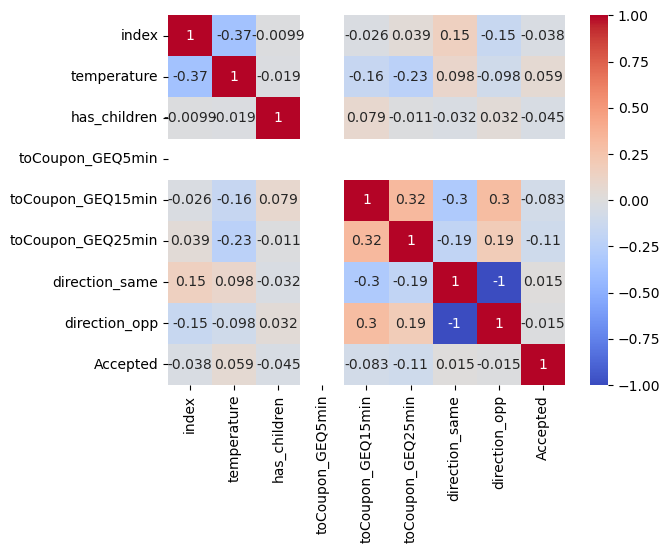

In [20]:
#remove dups


data = data.drop_duplicates(keep='first')
data = data.reset_index()

data.fillna(method="ffill",inplace=True)
data.fillna(method="bfill",inplace=True)

data.rename(columns = {'Y':'Accepted'}, inplace = True)


corr = data.corr(numeric_only=True)




# Create heatmap
sns.heatmap(corr, cmap='coolwarm',annot=True)



In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 12610 non-null  int64 
 1   destination           12610 non-null  object
 2   passanger             12610 non-null  object
 3   weather               12610 non-null  object
 4   temperature           12610 non-null  int64 
 5   time                  12610 non-null  object
 6   coupon                12610 non-null  object
 7   expiration            12610 non-null  object
 8   gender                12610 non-null  object
 9   age                   12610 non-null  object
 10  maritalStatus         12610 non-null  object
 11  has_children          12610 non-null  int64 
 12  education             12610 non-null  object
 13  occupation            12610 non-null  object
 14  income                12610 non-null  object
 15  car                   12610 non-null

4. What proportion of the total observations chose to accept the coupon? 

Records that are accepted coupons

In [22]:
(data.query('Accepted == 1')['Accepted'].agg(['count']))

count    7157
Name: Accepted, dtype: int64

In [23]:
accepted_percent = (data.query('Accepted == 1')['Accepted'].agg(['count'])/data[data.columns[0]].count() *100)

print(accepted_percent)

count    56.756542
Name: Accepted, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

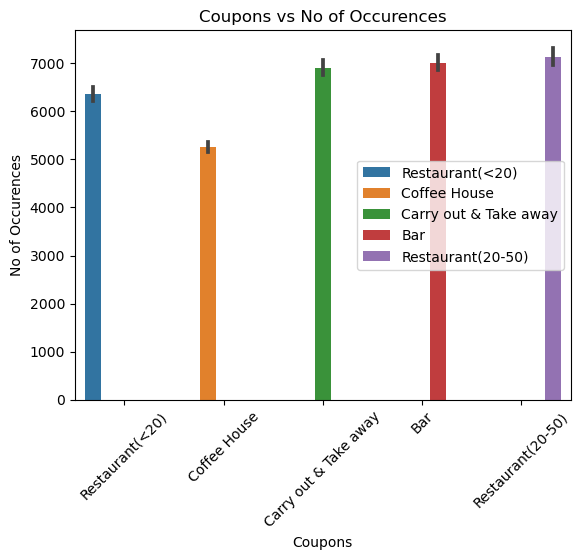

In [24]:
#data['Y'] = data['Y'].apply(lambda x: 'No' if x==0 else 'Yes')

fig = sns.barplot(data, y=data.index, x='coupon', hue='coupon')
plt.xticks(rotation=45)
plt.xlabel("Coupons")
plt.ylabel("No of Occurences")
plt.title("Coupons vs No of Occurences") 
plt.legend(loc='right')

6. Use a histogram to visualize the temperature column.

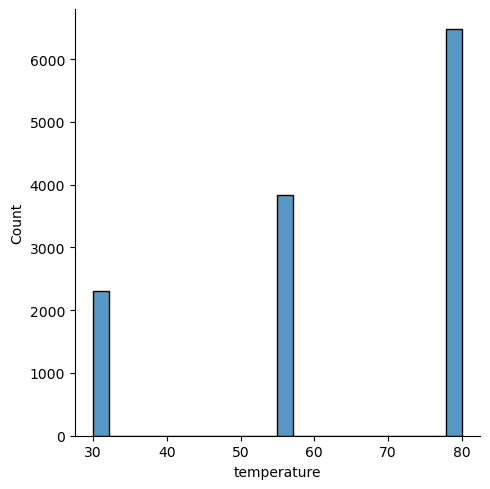

In [25]:

sns.displot(data, x="temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [26]:
bar_coupons_data =  data[data["coupon"] == "Bar"].reset_index(drop=True)
bar_coupons_data


,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
0,9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,...,never,4~8,4~8,1~3,1,1,0,0,1,0
1,13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,...,never,4~8,4~8,1~3,1,0,0,1,0,1
2,17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,...,never,4~8,4~8,1~3,1,1,1,0,1,0
3,24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,...,less1,4~8,4~8,less1,1,0,0,0,1,1
4,35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2006,12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2007,12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0
2008,12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [27]:
accepted_percent_bar = (bar_coupons_data.query('Accepted == 1')['Accepted'].agg(['count'])/data[data.columns[0]].count() *100)

print(accepted_percent_bar)

count    6.534496
Name: Accepted, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


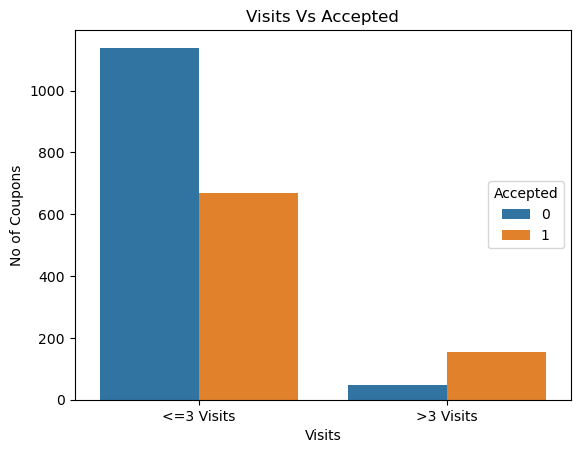

In [28]:

bar_visits_lt_eq_3=["never", "less1", "1~3"] 
bar_coupons_data['Bar Visits'] = bar_coupons_data['Bar'].apply(lambda x: '<=3 Visits' if x in bar_visits_lt_eq_3  else '>3 Visits')



bar_coupons_data_group_by = bar_coupons_data.groupby(['Bar Visits','Accepted'])['Accepted'].count()


bar_coupons_data_group_by_df = bar_coupons_data_group_by.to_frame()



bar_coupons_data_group_by_df = bar_coupons_data_group_by_df.rename(columns={'Accepted': 'Count'})
bar_coupons_data_group_by_df = bar_coupons_data_group_by_df.reset_index()

bar_coupons_data_group_by_df

fig = sns.barplot(bar_coupons_data_group_by_df, x='Bar Visits', y='Count', hue='Accepted')

plt.xlabel("Visits")
plt.ylabel("No of Coupons")
plt.title("Visits Vs Accepted") 
plt.legend(loc='right', title='Accepted')




4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<Axes: xlabel='passanger', ylabel='Count'>

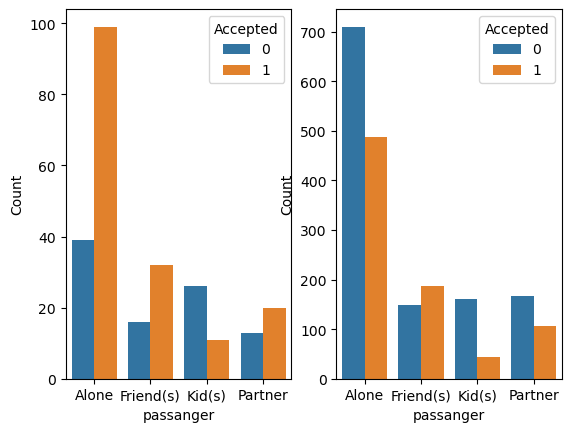

In [33]:

f, axes = plt.subplots(1, 2)

drivers_goto_bar_gt1month_gt25=bar_coupons_data.query('Bar in ["1~3","4~8","gt8"] and age in ["46","31","41","50plus","36"]' )

drivers_goto_bar_gt1month_gt25

drivers_goto_bar_gt1month_gt25_grp_by = drivers_goto_bar_gt1month_gt25.groupby(['passanger','Accepted'])['Accepted'].count()


drivers_goto_bar_gt1month_gt25_grp_by_df = drivers_goto_bar_gt1month_gt25_grp_by.to_frame()

drivers_goto_bar_gt1month_gt25_grp_by_df = drivers_goto_bar_gt1month_gt25_grp_by_df.rename(columns={'Accepted': 'Count'})
drivers_goto_bar_gt1month_gt25_grp_by_df = drivers_goto_bar_gt1month_gt25_grp_by_df.reset_index()


fig = sns.barplot(drivers_goto_bar_gt1month_gt25_grp_by_df, x='passanger', y='Count',hue='Accepted',ax=axes[0])




## total group

bar_coupons_data_grp_by = bar_coupons_data.groupby(['passanger','Accepted'])['Accepted'].count()

bar_coupons_data_grp_by
bar_coupons_data_grp_by_df = bar_coupons_data_grp_by.to_frame()

bar_coupons_data_grp_by_df = bar_coupons_data_grp_by_df.rename(columns={'Accepted': 'Count'})
bar_coupons_data_grp_by_df = bar_coupons_data_grp_by_df.reset_index()


sns.barplot(bar_coupons_data_grp_by_df, x='passanger', y='Count',hue='Accepted',ax=axes[1])




5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<Axes: xlabel='passanger', ylabel='Count'>

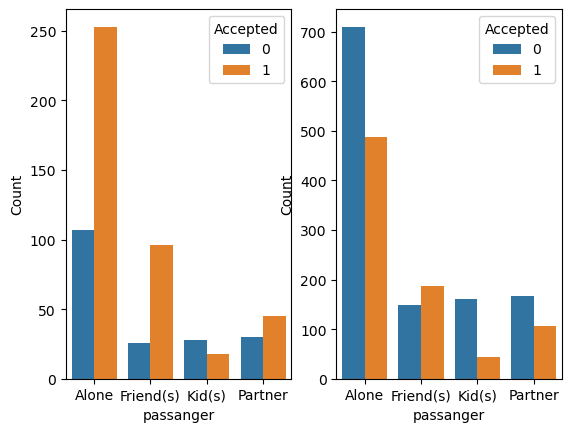

In [30]:
f, axes = plt.subplots(1, 2)

drivers_goto_bar_gt1month_Pass_not_kid=bar_coupons_data.query('Bar in ["1~3","4~8","gt8"] and passanger not in ["Kid\(s\)"] and occupation not in ["farming","fishing","forestry"]' )

drivers_goto_bar_gt1month_Pass_not_kid

drivers_goto_bar_gt1month_Pass_not_kid_grp_by = drivers_goto_bar_gt1month_Pass_not_kid.groupby(['passanger','Accepted'])['Accepted'].count()


drivers_goto_bar_gt1month_Pass_not_kid_grp_by_df = drivers_goto_bar_gt1month_Pass_not_kid_grp_by.to_frame()

drivers_goto_bar_gt1month_Pass_not_kid_grp_by_df


drivers_goto_bar_gt1month_Pass_not_kid_grp_by_df = drivers_goto_bar_gt1month_Pass_not_kid_grp_by_df.rename(columns={'Accepted': 'Count'})
drivers_goto_bar_gt1month_Pass_not_kid_grp_by_df = drivers_goto_bar_gt1month_Pass_not_kid_grp_by_df.reset_index()


fig = sns.barplot(drivers_goto_bar_gt1month_Pass_not_kid_grp_by_df, x='passanger', y='Count',hue='Accepted',ax=axes[0])




## total group

bar_coupons_data_grp_by = bar_coupons_data.groupby(['passanger','Accepted'])['Accepted'].count()

bar_coupons_data_grp_by
bar_coupons_data_grp_by_df = bar_coupons_data_grp_by.to_frame()

bar_coupons_data_grp_by_df = bar_coupons_data_grp_by_df.rename(columns={'Accepted': 'Count'})
bar_coupons_data_grp_by_df = bar_coupons_data_grp_by_df.reset_index()


sns.barplot(bar_coupons_data_grp_by_df, x='passanger', y='Count',hue='Accepted',ax=axes[1])




6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<Axes: xlabel='passanger', ylabel='Count'>

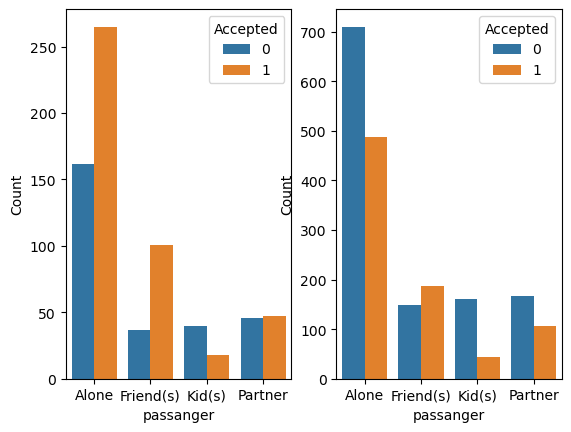

In [31]:
f, axes = plt.subplots(1, 2)

drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50=bar_coupons_data.query('(Bar in ["1~3","4~8","gt8"] and passanger not in ["Kid\(s\)"] and maritalStatus not in ["Widowed"]) or (Bar in ["1~3","4~8","gt8"] and age in ["below21", "21","26"]) or (RestaurantLessThan20 in ["4~8"] and income in ["$37500 - $49999","$25000 - $37499","Less than $12500"] )' )

drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50

drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50_grp_by = drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50.groupby(['passanger','Accepted'])['Accepted'].count()


drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50_grp_by_df = drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50_grp_by.to_frame()

drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50_grp_by_df


drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50_grp_by_df = drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50_grp_by_df.rename(columns={'Accepted': 'Count'})
drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50_grp_by_df = drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50_grp_by_df.reset_index()


fig = sns.barplot(drivers_goto_bar_gt1month_Pass_not_kid_not_wd_age30_cheapgt4_income_lt50_grp_by_df, x='passanger', y='Count',hue='Accepted',ax=axes[0])

#total group
bar_coupons_data_grp_by = bar_coupons_data.groupby(['passanger','Accepted'])['Accepted'].count()

bar_coupons_data_grp_by
bar_coupons_data_grp_by_df = bar_coupons_data_grp_by.to_frame()

bar_coupons_data_grp_by_df = bar_coupons_data_grp_by_df.rename(columns={'Accepted': 'Count'})
bar_coupons_data_grp_by_df = bar_coupons_data_grp_by_df.reset_index()


sns.barplot(bar_coupons_data_grp_by_df, x='passanger', y='Count',hue='Accepted',ax=axes[1])

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the obeservations above investigation, people who are alone in these specific criteria groups are more likely  to accept the coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Compare Men vs Women accepting the coupons


In [35]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 12610 non-null  int64 
 1   destination           12610 non-null  object
 2   passanger             12610 non-null  object
 3   weather               12610 non-null  object
 4   temperature           12610 non-null  int64 
 5   time                  12610 non-null  object
 6   coupon                12610 non-null  object
 7   expiration            12610 non-null  object
 8   gender                12610 non-null  object
 9   age                   12610 non-null  object
 10  maritalStatus         12610 non-null  object
 11  has_children          12610 non-null  int64 
 12  education             12610 non-null  object
 13  occupation            12610 non-null  object
 14  income                12610 non-null  object
 15  car                   12610 non-null

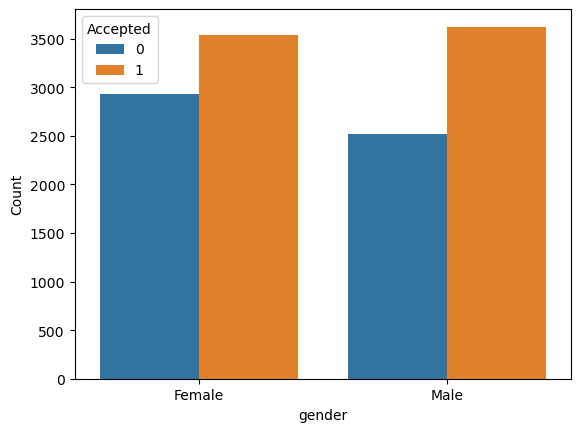

In [48]:

data_gender_accepted_grp_by = data.groupby(['gender','Accepted'])['Accepted'].count()

data_gender_accepted_grp_by

data_gender_accepted_grp_by_df = data_gender_accepted_grp_by.to_frame()

data_gender_accepted_grp_by_df


data_gender_accepted_grp_by_df = data_gender_accepted_grp_by_df.rename(columns={'Accepted': 'Count'})
data_gender_accepted_grp_by_df = data_gender_accepted_grp_by_df.reset_index()

data_gender_accepted_grp_by_df



fig = sns.barplot(data_gender_accepted_grp_by_df, x='gender', y='Count',hue='Accepted')






It seems like more men are accpeting coupons regardless of any other criteria

I would like to do more anaysis on each group as a homework to identify what else we can find in each group

### Will a Customer Accept the Coupon? Final Report

The datase
